## CAPSTONE PROJECT CORONA PREDICTION

### Introduction

In the realm of public health, predictive models for COVID-19 play a pivotal role in anticipating and managing the spread of the virus. These models, designed for corona prediction, leverage data-driven insights to forecast potential outbreaks, identify vulnerable populations, and optimize resource allocation. For governments, the utility lies in informed decision-making, allowing timely implementation of preventive measures, resource distribution, and vaccination strategies.

#Feature names

1. **ID**(Individual ID)

2. **Sex** (male/female).

3. **Age ≥60 above years** (true/false)

4. **Test date**(date when tested for COVID)

5. **Cough** (true/false).

6. **Fever** (true/false).

7. **Sore throat** (true/false).

8. **Shortness of breath** (true/false).

9. **Headache** (true/false).

10.**Known contact with an individual confirmed to have COVID-19** (true/false).

11. **Corona** (positive or negative)


In [5]:
#importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go

In [6]:
#reading the csv data file 
data=pd.read_csv(r"C:\LOCAL DISK (D)\backup kartik\personal (DS)\projects\ML capstone project (corona prediction) -\corona_tested_006.csv",low_memory=False)

In [7]:
data

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,True,False,True,False,False,negative,NaN,NaN,Abroad
1,2,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
2,3,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
3,4,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Abroad
4,5,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,30-04-2020,False,False,False,False,False,positive,NaN,male,Other
278844,278845,30-04-2020,False,False,False,False,False,negative,NaN,female,Other
278845,278846,30-04-2020,False,False,False,False,False,negative,NaN,male,Other
278846,278847,30-04-2020,False,False,False,False,False,negative,NaN,male,Other


#Exploratory Data Analysis (EDA)

In [4]:
#checking info of data , count, not null and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278596 non-null  object
 3   Fever                278596 non-null  object
 4   Sore_throat          278847 non-null  object
 5   Shortness_of_breath  278847 non-null  object
 6   Headache             278847 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         151528 non-null  object
 9   Sex                  259285 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


In [5]:
#checking null values in data
data.isnull().sum()

Ind_ID                      0
Test_date                   0
Cough_symptoms            252
Fever                     252
Sore_throat                 1
Shortness_of_breath         1
Headache                    1
Corona                      0
Age_60_above           127320
Sex                     19563
Known_contact               0
dtype: int64

In [6]:
#filling the null values with mode in respective columns 
data["Sore_throat"].fillna(data.mode, inplace = True)
data["Shortness_of_breath"].fillna(data.mode, inplace = True)
data["Headache"].fillna(data.mode, inplace = True)

In [7]:
#filling the null values with respective value in these columns
data["Cough_symptoms"].fillna("not known", inplace = True)
data["Fever"].fillna("not known", inplace = True)
data["Age_60_above"].fillna("not known", inplace = True)
data["Sex"].fillna("others", inplace = True)


In [8]:
#checking data whether null values if filled
data.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,True,False,True,False,False,negative,not known,others,Abroad
1,2,11-03-2020,False,True,False,False,False,positive,not known,others,Abroad
2,3,11-03-2020,False,True,False,False,False,positive,not known,others,Abroad
3,4,11-03-2020,True,False,False,False,False,negative,not known,others,Abroad
4,5,11-03-2020,True,False,False,False,False,negative,not known,others,Contact with confirmed


In [9]:
data.dtypes

Ind_ID                  int64
Test_date              object
Cough_symptoms         object
Fever                  object
Sore_throat            object
Shortness_of_breath    object
Headache               object
Corona                 object
Age_60_above           object
Sex                    object
Known_contact          object
dtype: object

In [10]:
#checking again if there is still null values remaining
data.isnull().sum()

Ind_ID                 0
Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
dtype: int64

In [11]:
#checking if there is duplicate values in data
data.duplicated().head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [ ]:
#checking if any row is duplicate among all rows
duplicate_rows = data[data.duplicated()]
print("All duplicates:")
print(duplicate_rows)

All duplicates:
Empty DataFrame
Columns: [Ind_ID, Test_date, Cough_symptoms, Fever, Sore_throat, Shortness_of_breath, Headache, Corona, Age_60_above, Sex, Known_contact]
Index: []


# DATA VISUALISATION

people having cough symptoms 
 Cough_symptoms
False        236368
True          42228
not known       252
Name: count, dtype: int64


<Axes: xlabel='Cough_symptoms', ylabel='count'>

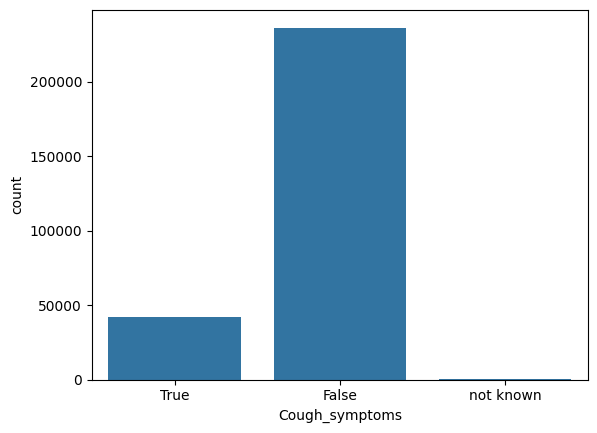

In [12]:
#count plot to see cough symptoms among the people
category_counts = data['Cough_symptoms'].value_counts()
print("people having cough symptoms \n",category_counts)
sns.countplot(x='Cough_symptoms',data=data,)

people having Fever 
 Fever
False        256844
True          21752
not known       252
Name: count, dtype: int64


<Axes: xlabel='Fever', ylabel='count'>

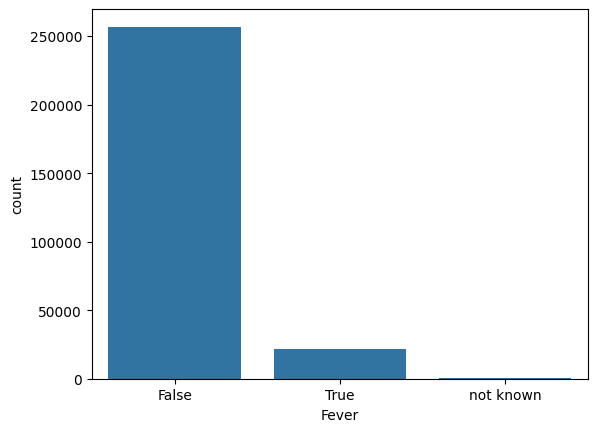

In [13]:
#count plot to see fever among the people
category_counts = data['Fever'].value_counts()
print("people having Fever \n",category_counts)
sns.countplot(x='Fever',data=data,)

Gender count 
 Sex
female    130158
male      129127
others     19563
Name: count, dtype: int64


<Axes: xlabel='Sex', ylabel='count'>

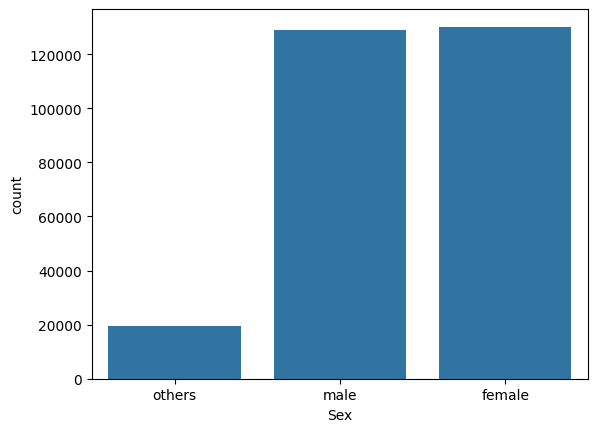

In [14]:
#count plot to see gender of people
category_counts = data['Sex'].value_counts()
print("Gender count \n",category_counts)
sns.countplot(x='Sex',data=data)

people  Age_60_above 
 Age_60_above
not known    127320
No           125703
Yes           25825
Name: count, dtype: int64


<Axes: xlabel='Age_60_above', ylabel='count'>

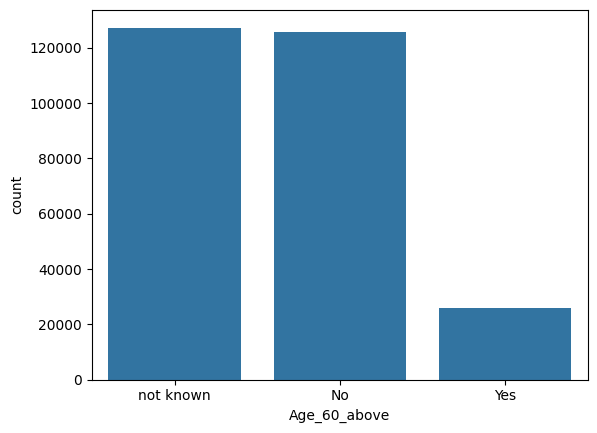

In [15]:
#count plot to see age above 60 among the people
category_counts = data['Age_60_above'].value_counts()
print("people  Age_60_above \n",category_counts)
sns.countplot(x='Age_60_above',data=data)

people having Corona 
 Corona
negative    260227
positive     14729
other         3892
Name: count, dtype: int64


<Axes: xlabel='Corona', ylabel='count'>

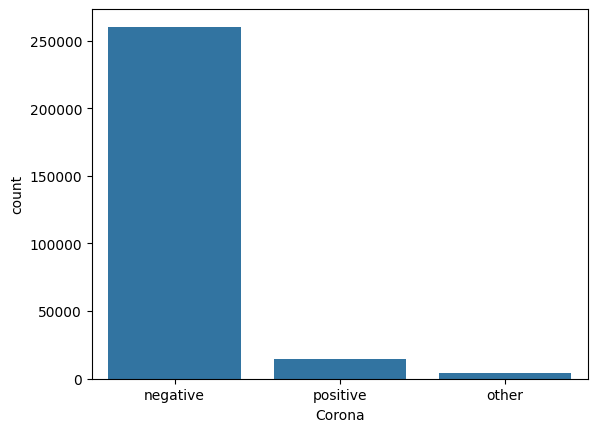

In [16]:
#count plot to see corona  among the people
category_counts = data['Corona'].value_counts()
print("people having Corona \n",category_counts)
sns.countplot(x='Corona',data=data)

## FEATURE ENGINEERING

In [10]:
#importing library for encoding of data
from sklearn.preprocessing import LabelEncoder

In [11]:
#encoding with label encoder to the categorical variable where data type is object
le=LabelEncoder()
for column in data:
  if data[column].dtypes == 'object':
    data[column] = data[column].astype(str)
    data[column]=le.fit_transform(data[column])  #it transforms the data 

In [12]:
#check  encoding
data.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,10,1,0,1,0,0,0,2,2,0
1,2,10,0,1,0,0,0,2,2,2,0
2,3,10,0,1,0,0,0,2,2,2,0
3,4,10,1,0,0,0,0,0,2,2,0
4,5,10,1,0,0,0,0,0,2,2,1


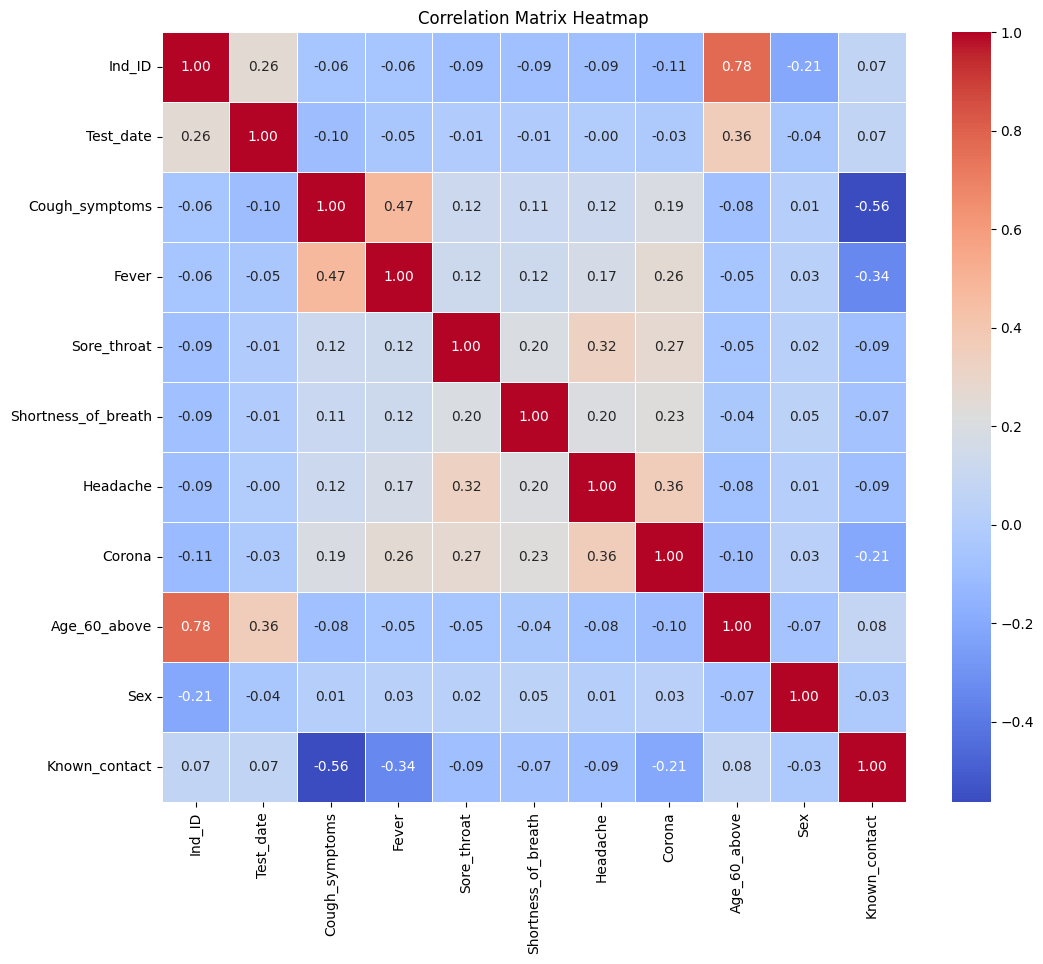

In [13]:
#checking co-relation among all the columns to check best fit for evaluation 
dfcorr=data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(dfcorr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [14]:
#removing these columns from evaluation
data= data.drop(['Ind_ID','Known_contact','Sex'],axis=1)

In [16]:
#checking the columns 
data.columns

Index(['Test_date', 'Cough_symptoms', 'Fever', 'Sore_throat',
       'Shortness_of_breath', 'Headache', 'Corona', 'Age_60_above'],
      dtype='object')

In [17]:
#importing liberay for feature scaling of data  , here we used standardscaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data) #data scaled 

In [18]:
#checking for scaled data
data_scaled

array([[-1.03361823,  2.33443792, -0.29095294, ..., -0.09344865,
        -0.26040655,  1.04372497],
       [-1.03361823, -0.42248387,  3.35443013, ..., -0.09344865,
         4.09424683,  1.04372497],
       [-1.03361823, -0.42248387,  3.35443013, ..., -0.09344865,
         4.09424683,  1.04372497],
       ...,
       [ 1.49898658, -0.42248387, -0.29095294, ..., -0.09344865,
        -0.26040655,  1.04372497],
       [ 1.49898658, -0.42248387, -0.29095294, ..., -0.09344865,
        -0.26040655,  1.04372497],
       [ 1.49898658, -0.42248387, -0.29095294, ..., -0.09344865,
        -0.26040655,  1.04372497]])

In [19]:
#seperating target variable that we want to use for prediction
x=data.drop(columns='Corona')
y=data['Corona']

In [20]:
#importing liberay for spliting the data into train and test data to be used in ML model for prediction
from sklearn.model_selection import train_test_split

In [21]:
#spliting the data ,here we split data on 4:1 ratio
X_train,X_test,Y_train,Y_test = train_test_split(x,y , test_size = 0.2)

In [22]:
#checking the details in train data
X_train.shape

(223078, 7)

In [23]:
#checking the details in test data
X_test.shape


(55770, 7)

In [24]:
Y_train.shape

(223078,)

In [25]:
Y_test.shape

(55770,)

### MODEL 1
- LOGISTIC REGRESSION

In [26]:
#importing logistic regression model for prediction
from sklearn.linear_model import LogisticRegression

In [27]:
#fitting train data
LR=LogisticRegression()
LR.fit(X_train,Y_train)

c:\Users\vshiv\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
y_predict= LR.predict(X_test)

In [29]:
print("Logistic regression training set score ", LR.score(X_train,Y_train))
print("Logistic regression testing set score ", LR.score(X_test,Y_test))
print("Logistic Regression Model accuracy score ", accuracy_score(Y_test,y_predict))

Logistic regression training set score  0.9436699271106967
Logistic regression testing set score  0.9424242424242424
Logistic Regression Model accuracy score  0.9424242424242424


### MODEL 2
- DecisionTreeClassifier

In [30]:
#importing decision tree classifier model for prediction
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train,Y_train)

DecisionTreeClassifier()

In [31]:
y_pred = DT.predict(X_test)
print("Decision Tree set score ", DT.score(X_train,Y_train))
print("Decision Tree set score ", DT.score(X_test,Y_test))
print("Decision Tree Classifier Model accuracy score ", accuracy_score(Y_test,y_predict))

Decision Tree set score  0.9478433552389747
Decision Tree set score  0.945311099157253
Decision Tree Classifier Model accuracy score  0.9424242424242424


In [32]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
model = DecisionTreeClassifier()
s_split = ShuffleSplit(n_splits = 5,test_size=0.25)
results=cross_val_score(model,x,y,cv=s_split)
print(results)
print(np.mean(results))

[0.94606381 0.94652284 0.94547567 0.94649415 0.9467667 ]
0.9462646316272665


### MODEL 3
- RANDOM FOREST CLASSIFICATION

In [33]:
#importing RANDOM FOREST CLASSIFICATION model for prediction
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train,Y_train)

RandomForestClassifier()

In [34]:
y_pred = RF.predict(X_test)
print("Random Forest training set score ", RF.score(X_train,Y_train))
print("Random Forest testing set score ", RF.score(X_test,Y_test))
print("Random Forest Classifier Model accuracy score ", accuracy_score(Y_test,y_predict))

Random Forest training set score  0.9478388725019948
Random Forest testing set score  0.9457414380491304
Random Forest Classifier Model accuracy score  0.9424242424242424


In [35]:
#cross validation score to check improved score if returned
model = RandomForestClassifier()
s_split = ShuffleSplit(n_splits = 5,test_size=0.25)
results=cross_val_score(model,x,y,cv=s_split)
print(results)
print(np.mean(results))

[0.94713966 0.94645111 0.94670932 0.9470249  0.94636504]
0.9467380078035346


### MODEL 4
- K NEIGHBORSCLASSIFIER

In [36]:
#importing K NEIGHBORSCLASSIFIER model for prediction
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [37]:
Y_knpredict = knn.predict(X_test)
print("KNN training set score ", knn.score(X_train,Y_train))
print("KNN testing set score ", knn.score(X_test,Y_test))
print("KNN Model accuracy score ", accuracy_score(Y_test,y_predict))

KNN training set score  0.9457947444391648
KNN testing set score  0.9436614667383898
KNN Model accuracy score  0.9424242424242424


In [38]:
model = KNeighborsClassifier()
s_split = ShuffleSplit(n_splits = 5,test_size=0.20)
results=cross_val_score(model,x,y,cv=s_split)
print(results)
print(np.mean(results))

[0.94382284 0.94348216 0.94394836 0.94475524 0.94629729]
0.9444611798457953


In [39]:
KNN_accuracy = 0.9444611798457953
RFC_accuracy = 0.9467380078035346
DTC_accuracy = 0.9462646316272665
LRC_accuracy = 0.9424242424242424

In [40]:
models = ['KNN Classifier', 'Random Forest Classifier', 'Descision Tree Classifier', 'Logistic Regression Classifier']
accuracies = [0.9444611798457953,   0.9467380078035346,  0.9462646316272665, 0.9424242424242424]


In [41]:
accuracies_percentage = [accuracy * 100 for accuracy in accuracies]

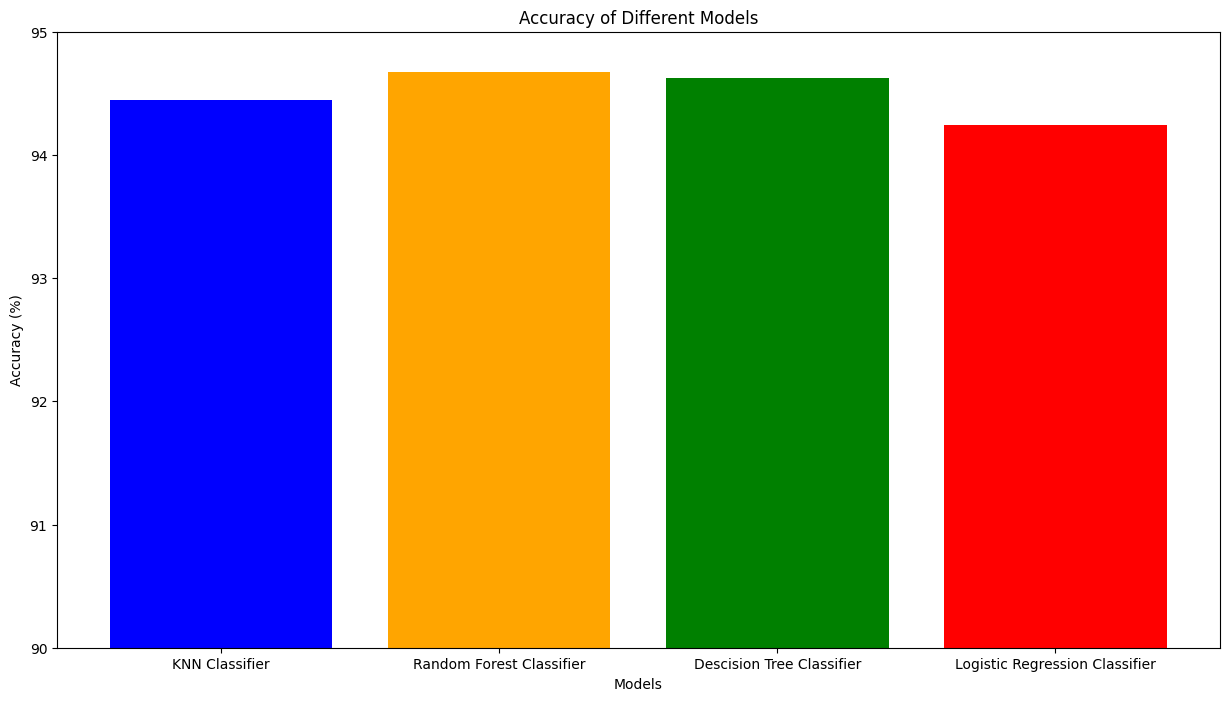

In [42]:
plt.figure(figsize=(15,8))
plt.bar(models, accuracies_percentage, color=['blue', 'orange', 'green', 'red', ])
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of Different Models')
plt.ylim(90, 95)
plt.show()

- conclusion

In evaluating predictive models
 — KNN Classifier, Random Forest Classifier, and Decision Tree Classifier — all demonstrated commendable accuracy, ranging from 94.14% to 94.68%. These results underscore the effectiveness of these models in credit card approval prediction, offering reliable performance for informed decision-making in financial scenarios.